In [2]:
import numpy as np
import pickle
import re
import tensorflow as tf

In [3]:
fb = pickle.load(open("/home/markus/dep/dep_data/bases/fb.pickle","rb"))
fs = pickle.load(open("/home/markus/dep/dep_data/bases/fs.pickle","rb"))
sd = pickle.load(open("/home/markus/dep/dep_data/bases/sd.pickle", "rb"))
zero = [np.zeros(fb[0].shape),np.zeros(fb[1].shape), np.zeros(fb[2].shape)]

bases = {"fb": fb, "fs": fs, "sd": sd, "zero": zero}

In [4]:
active_motors = [1,3,4,5,10,12]

In [5]:
# need to load dep matrix
def loadDepMatrix(filename):
    file_ = "../dep_matrices/"+filename
    f = open(file_,"rb")
    text = f.read()
    f.close()
    matrix = np.array([np.array(re.split(",", row.strip(","))).astype(float) for row in re.split("NEW_ROW", text.strip(",NEW_ROW,"))])
    return matrix

In [6]:
# need function that does DEP calculation from input to output
def dep_out(sensors, weights):
    with tf.name_scope("input"):
        input_ = tf.placeholder(tf.float32, [None,28], name="input") #differential sensors
    with tf.name_scope("weights"):
        weights = tf.placeholder(tf.float32, [None,14,28], name="weights")
    with tf.name_scope("output"):
        in_ = tf.reduce_sum(weights*input_,axis=2)
        out_ = tf.tanh(in_)
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    out = sess.run(out_,{input_: sensors, weights: matrix})
    sess.close()
    return out

### Plotting

In [7]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [8]:
def plot_data(data):
    color_pallette = ['#2274A5', '#B4656F', '#4E937A', '#F3D34A', '#A11692', '#F75C03', '#F1C40F', '#D90368', '#00CC66', '#540B0E', '#2274A5', '#B4656F', '#4E937A', '#F3D34A']
    motor_to_muscle = [0, 1, 0, 2, 6, 5, 0, 0, 0, 0, 4, 0, 3, 0]

    for motor in range(data[0,:].size):
        if sum(data[:,motor]) == 0:
            # motor not connected
            continue
        plt.figure(1)
        plt.plot(data[:,motor],color=color_pallette[motor], linewidth=1.0, label="Muscle "+str(motor_to_muscle[motor]))

    # configure plots
    fontP = FontProperties()
    fontP.set_size('small')
    plt.figure(1)
    plt.ylabel("Motor position (rad)")
    plt.xlabel("Time (s)")
    plt.legend(loc="lower center", mode="expand", ncol=6, prop=fontP)
    plt.show()

### Verify dep_out

In [9]:
filename = "front_back.dep"
matrix = loadDepMatrix(filename).reshape(1,14,28)

In [ ]:
#TO DO:
# need to have proper input i.e. pos AND force

In [26]:
np.max(bases["fb"][2])*0.2375

152.94999999999999

In [27]:
# Let's test the dep calculation by running through a full behavior, plotting its output to make sure it is working properly
data = []
d = 50
for t in range(bases["fb"][0].shape[0]):
    pos = bases["fb"][0][t]/100000.
    force = (bases["fb"][2][t]*0.2375-5)/300.
    pos_delayed = bases["fb"][0][t-d]/100000.
    force_delayed = (bases["fb"][2][t-d]*0.2375-5)/300.
    sensors = np.append(pos+force,pos_delayed+force_delayed).reshape(1,28)
    out = dep_out(sensors,matrix).reshape(14,)
    data.append(out)
data = np.array(data)

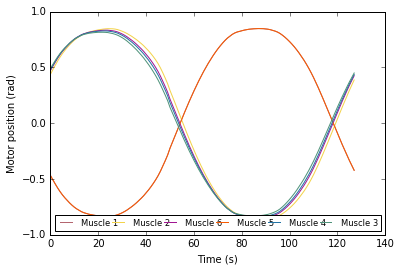

In [28]:
plot_data(data)

In [ ]:
# Seems to working reasonably

### DEP matrix with wrong behavior

In [33]:
filename = "front_back.dep"
matrix = loadDepMatrix(filename).reshape(1,14,28)

In [34]:
# What happens when you feed the sensory data from a different behavior through
data = []
d = 50
for t in range(bases["fs"][0].shape[0]):
    pos = bases["fs"][0][t]/100000.
    force = (bases["fs"][2][t]*0.2375-5)/300.
    pos_delayed = bases["fs"][0][t-d]/100000.
    force_delayed = (bases["fs"][2][t-d]*0.2375-5)/300
    sensors = np.append(pos+force,pos_delayed+force_delayed).reshape(1,28)
    out = dep_out(sensors,matrix).reshape(14,)
    data.append(out)
data = np.array(data)

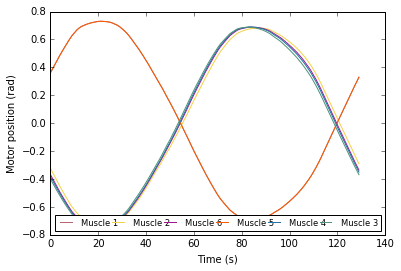

In [35]:
plot_data(data)